# Consumo de Alcohol en Adolescentes
Siguiendo el libro "Aprende Machine Learning con Scikit-Learn, Keras y Tensorflow" Ejecutaré un proyecto de Machine Learning.

# Data Download


In [60]:
!kaggle datasets download -d uciml/student-alcohol-consumption

"kaggle" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [61]:
import zipfile

with zipfile.ZipFile('student-alcohol-consumption.zip', 'r') as zip_ref:
    zip_ref.extractall('student-alcohol-consumption')


# Data Overview

In [62]:
import pandas as pd
#Load the datasets
math_data = pd.read_csv('student-alcohol-consumption/student-mat.csv')
port_data = pd.read_csv('student-alcohol-consumption/student-por.csv')

print(math_data.head())
print(port_data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [63]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [64]:
port_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Merge

In [65]:
d1 = math_data
d2 = port_data

#Perform the merge
merge1 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
print(f"Number of students in the merged dataset: {len(merge1)}")  # Should print 382


Number of students in the merged dataset: 382


In [66]:
# Further merge...
import numpy as np

# Make a copy of the original DataFrame to work on
df = merge1.copy()

# Variables to check for merging, including the new ones
variables_to_merge = ["traveltime", "studytime", "goout", "freetime", "health", "Dalc", "Walc", "famrel",
                      "guardian", "higher", "romantic", "schoolsup", "famsup", "activities"]

for var in variables_to_merge:
    x_col = f"{var}_x"
    y_col = f"{var}_y"
    
    # Check if the '_x' and '_y' columns have identical non-NaN values
    identical_mask = (df[x_col] == df[y_col]) | (df[x_col].isna() & df[y_col].isna())
    
    # For identical values, keep the value in a new column without '_x' or '_y' suffix
    # If values differ, the result is NaN
    df[var] = np.where(identical_mask, df[x_col], np.nan)
    
    # Drop the original '_x' and '_y' columns
    df.drop(columns=[x_col, y_col], inplace=True)

# Drop rows where '_x' and '_y' values were not identical
# This removes any row where at least one of the specified variables had differing '_x' and '_y' values
df.dropna(subset=variables_to_merge, inplace=True)

# Display the resulting DataFrame
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
376     MS   F   19       R     GT3       T     2     3  services     other   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... health  Dalc Walc famrel guardian  higher 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 381
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      370 non-null    object 
 1   sex         370 non-null    object 
 2   age         370 non-null    int64  
 3   address     370 non-null    object 
 4   famsize     370 non-null    object 
 5   Pstatus     370 non-null    object 
 6   Medu        370 non-null    int64  
 7   Fedu        370 non-null    int64  
 8   Mjob        370 non-null    object 
 9   Fjob        370 non-null    object 
 10  reason      370 non-null    object 
 11  failures_x  370 non-null    int64  
 12  paid_x      370 non-null    object 
 13  nursery     370 non-null    object 
 14  internet    370 non-null    object 
 15  absences_x  370 non-null    int64  
 16  G1_x        370 non-null    int64  
 17  G2_x        370 non-null    int64  
 18  G3_x        370 non-null    int64  
 19  failures_y  370 non-null    int64 

### Value Counts of object types

In [68]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Value Counts for column {column}:\n{df[column].value_counts()}\n")

Value Counts for column school:
school
GP    331
MS     39
Name: count, dtype: int64

Value Counts for column sex:
sex
F    195
M    175
Name: count, dtype: int64

Value Counts for column address:
address
U    289
R     81
Name: count, dtype: int64

Value Counts for column famsize:
famsize
GT3    266
LE3    104
Name: count, dtype: int64

Value Counts for column Pstatus:
Pstatus
T    332
A     38
Name: count, dtype: int64

Value Counts for column Mjob:
Mjob
other       134
services     93
teacher      57
at_home      53
health       33
Name: count, dtype: int64

Value Counts for column Fjob:
Fjob
other       205
services    103
teacher      29
health       17
at_home      16
Name: count, dtype: int64

Value Counts for column reason:
reason
course        135
home          103
reputation     98
other          34
Name: count, dtype: int64

Value Counts for column paid_x:
paid_x
no     196
yes    174
Name: count, dtype: int64

Value Counts for column nursery:
nursery
yes    298
no      72
N

In [69]:
with pd.option_context('display.max_columns', None):
    print(df.describe())

              age        Medu        Fedu  failures_x  absences_x        G1_x  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean    16.575676    2.800000    2.556757    0.278378    5.381081   10.891892   
std      1.180672    1.083505    1.086138    0.710599    7.665653    3.345375   
min     15.000000    0.000000    0.000000    0.000000    0.000000    3.000000   
25%     16.000000    2.000000    2.000000    0.000000    0.000000    8.000000   
50%     17.000000    3.000000    3.000000    0.000000    4.000000   11.000000   
75%     17.000000    4.000000    3.750000    0.000000    8.000000   13.000000   
max     22.000000    4.000000    4.000000    3.000000   75.000000   19.000000   

             G2_x        G3_x  failures_y  absences_y        G1_y        G2_y  \
count  370.000000  370.000000  370.000000  370.000000  370.000000  370.000000   
mean    10.751351   10.464865    0.132432    3.632432   12.135135   12.270270   
std      3.800986    4.6088

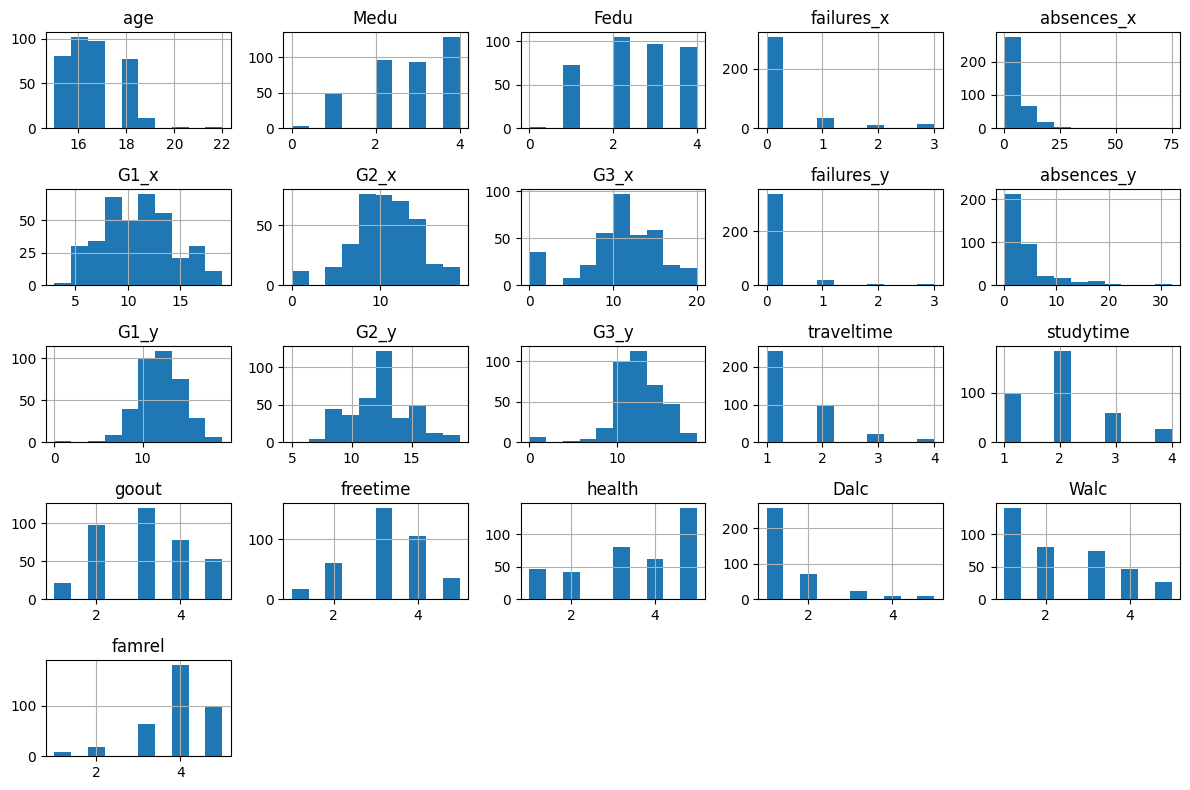

In [70]:
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number')

# Plot histograms for each numeric column
numeric_columns.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [71]:
df_unprocessed = df.copy()

# Testing sample

## Create a unique identifier to avoid contamination when the dataset gets updated

In [72]:
import hashlib

# Create a function to hash the values in each row
def hash_row(row):
    values = row.values
    hash_object = hashlib.md5(str(values).encode())
    return hash_object.hexdigest()

# Apply the hash function to create a unique identifier for each row
df['unique_id'] = df.apply(hash_row, axis=1)

# Print the dataframe with the unique identifier
print(df)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
376     MS   F   19       R     GT3       T     2     3  services     other   
377     MS   F   18       U     LE3       T     3     1   teacher  services   
379     MS   F   18       U     GT3       T     1     1     other     other   
380     MS   M   17       U     LE3       T     3     1  services  services   
381     MS   M   18       R     LE3       T     3     2  services     other   

     ... Dalc  Walc famrel guardian higher  romanti

In [74]:
from sklearn.model_selection import train_test_split

# Asumimos que 'df' ya está limpio y listo para dividir
# Estratificamos por la columna 'sex', asumiendo que esta es la que contiene el género
X = df.drop(columns=['sex'])  # Omitimos la columna 'sex' en X
y = df['sex']  # Usamos 'sex' como la variable para estratificar

# Dividir el conjunto de datos estratificadamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combina X y y de entrenamiento/prueba para reconstruir los conjuntos completos
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)


Entrenamiento: 296, Prueba: 74, Total: 370


### Stratify by sex

In [75]:
# Asumiendo que df tiene una columna 'unique_id' que quieres usar para la división consistente
def in_test_set(uid, test_ratio=0.2):
    # Esta es una función simplificada que asume que el hash ya está en 'unique_id'
    return int(uid, 16) % 100 < test_ratio * 100

# Crear una máscara booleana para seleccionar el conjunto de prueba basado en el 'unique_id'
is_test = df['unique_id'].apply(in_test_set)

# Dividir el DataFrame en conjuntos de entrenamiento y prueba usando la máscara
train_set = df[~is_test]
test_set = df[is_test]

print(f"Conjunto de entrenamiento inicial: {len(train_set)}, Conjunto de prueba inicial: {len(test_set)}")


Conjunto de entrenamiento inicial: 294, Conjunto de prueba inicial: 76
